# Scenario Testing BHC Module

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy import linalg as la
from scipy import random as rnd
from scipy.special import gamma
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Univariate Gaussian mixture (example data set):

In [17]:
rnd.seed(1)
mu1, s1, n1 = (0,1,100)
mu2, s2, n2 = (3,0.75,50)
mu3, s3, n3 = (-2,1.2,180)
# generate random values
g1 = rnd.normal(loc=mu1, scale=s1, size=n1)
g2 = rnd.normal(loc=mu2, scale=s2, size=n2)
g3 = rnd.normal(loc=mu3, scale=s3, size=n3)
# store values
tst_pts = np.zeros(n1+n2+n3)
tst_pts[:n1] = g1
tst_pts[n1:n1+n2] = g2
tst_pts[n1+n2:] = g3

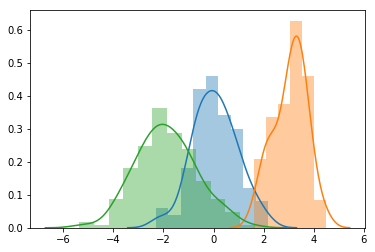

In [18]:
sns.distplot(g1)
sns.distplot(g2)
sns.distplot(g3)
plt.show()

#### Three component multivariate Gaussian mixture (example data set):

In [ ]:
n_dim = 3 # dimension of problem

# bivariate gaussian params
mu1 = np.zeros(3)
cov1 = np.eye(3)

mu2 = np.array([5, 3, 0])
cov2 = np.eye(3)

mu3 = np.array([8, 12, 1])
cov3 = np.eye(3)* 0.5

# multinom params
p1 = 0.3
p2 = 0.4
p3 = 1 - p2 - p1

# number of total draws
draws = 100

In [ ]:
# random draws
rnd.seed(1)

knum = rnd.multinomial(draws, (p1, p2, p3))

gaus1 = rnd.multivariate_normal(mu1, cov1, knum[0])
gaus2 = rnd.multivariate_normal(mu2, cov2, knum[1])
gaus3 = rnd.multivariate_normal(mu3, cov3, knum[2])

# join columns into dataframe
x1 = pd.Series(np.r_[gaus1[:, 0], gaus2[:, 0], gaus3[:, 0]])
x2 = pd.Series(np.r_[gaus1[:, 1], gaus2[:, 1], gaus3[:, 1]])
x3 = pd.Series(np.r_[gaus1[:, 2], gaus2[:, 2], gaus3[:, 2]])
c = pd.Series(np.r_[np.zeros(knum[0]), np.ones(knum[1]), np.ones(knum[2]) * 2])
dat = {"x1" : x1, "x2" : x2, "x3" : x3, "c" : c}
clustData = pd.DataFrame(dat)

In [ ]:
plt.scatter(clustData["x1"], clustData["x2"], c = clustData["c"])
plt.title("Visualizing the Clusters")
plt.show()